In [1]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
superstore_df=pd.read_csv(r'C:\Users\Public.LAPTOP-VFGTA9FH\Desktop\superstore_dataset2011-2015.csv',encoding='latin-1')

In [10]:
superstore_df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [11]:
# DATA EXPLORATION
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [12]:
superstore_df.shape

(51290, 24)

In [13]:
superstore_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [14]:
# Data preperation
superstore_df=superstore_df.drop(['Country','Postal Code','Discount'],axis=1)

In [ ]:
#Dropping columns - Country, Postal Code, Discount, these are the fields which do not contribute much to predict the profit, sales.

In [15]:
category_group = superstore_df.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
segment_group = superstore_df.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
region_group = superstore_df.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
state_group = superstore_df.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
shipmode_group = superstore_df.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/3448398341.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_group = superstore_df.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/3448398341.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_group = superstore_df.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/3448398341.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_group = superstore_df.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/3448398341.py:4: Futur

In [ ]:
# Box plot for all numerical variable and check for outliers

<AxesSubplot:>

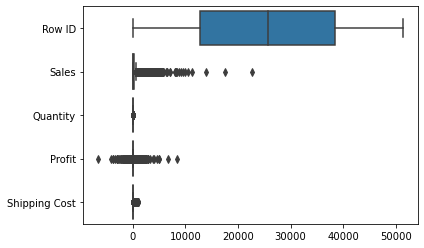

In [45]:
sns.boxplot( data = superstore_df, orient="h")

In [ ]:
# EDA Region-wise

In [16]:
region_group.head(10)

,Region,Sales,Quantity,Profit
0,Africa,170.868370,2.303030,19.374674
1,Canada,174.292109,2.169271,46.399453
2,Caribbean,191.882166,3.727219,20.456403
3,Central,253.872674,3.756589,28.011512
4,Central Asia,367.591097,3.767090,64.687591
5,EMEA,160.302508,2.290117,8.728966
6,East,238.336110,3.728230,32.135808
7,North,260.849656,3.766144,40.668329
8,North Asia,362.835663,3.785714,70.820539
9,Oceania,315.510356,3.681675,34.439091


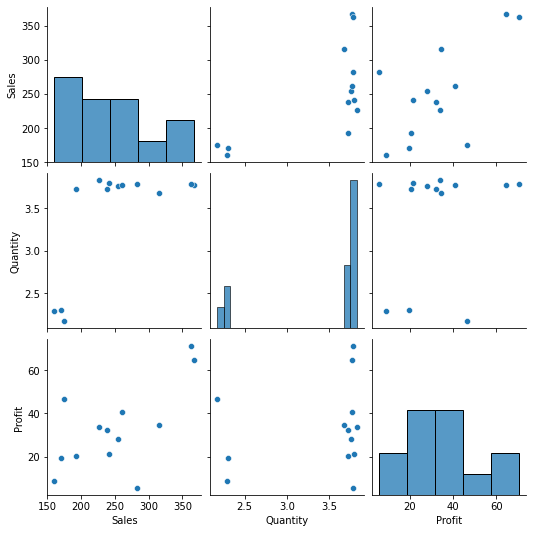

In [46]:
sns.pairplot(region_group, diag_kind='hist')

In [ ]:
# EDA Ship Mode Wise

In [47]:
shipmode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,243.967507,3.469554,27.728804
1,Same Day,247.020357,3.417253,28.201802
2,Second Class,248.876873,3.465322,28.381368
3,Standard Class,246.260020,3.487214,28.938945


Text(0.5, 1.0, 'Ship Mode-Wise Profit Gained')

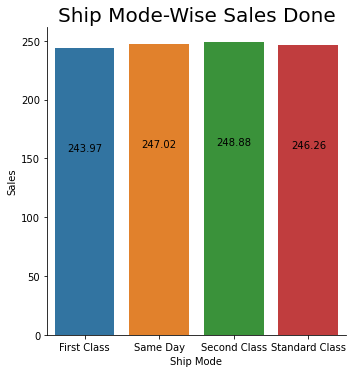

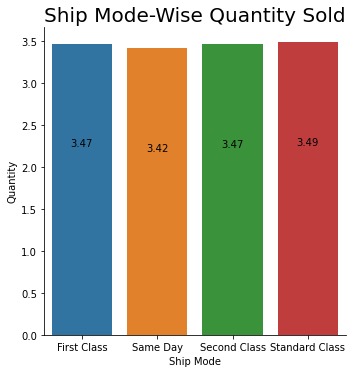

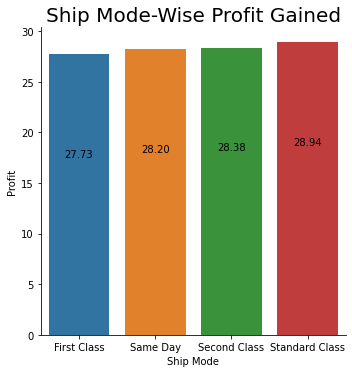

In [49]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Profit Gained", fontsize=20)

In [ ]:
From these graphs, we can conclude that ship mode doesn't affect the Profit, Sales and Quantity. All types of Ship Mode show the almost same values. 

In [ ]:
# EDA Segment-Wise

In [20]:
segment_group

,Segment,Sales,Quantity,Profit
0,Consumer,245.416299,3.475262,28.254008
1,Corporate,247.890176,3.471709,28.596042
2,Home Office,247.228403,3.488173,29.648847


<AxesSubplot:xlabel='Segment', ylabel='Sales'>

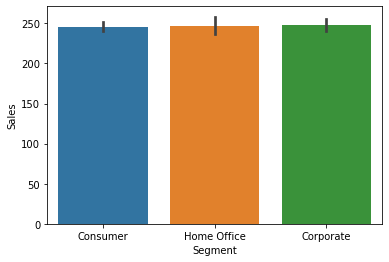

In [21]:
sns.barplot(data=superstore_df , x = 'Segment', y = 'Sales', estimator = np.mean)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

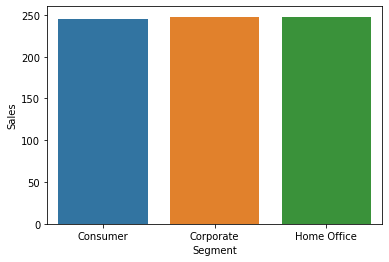

In [22]:
sns.barplot(data = segment_group, x = 'Segment', y = 'Sales', estimator = np.mean)

Text(0.5, 1.0, 'Segment-Wise Profit Gained')

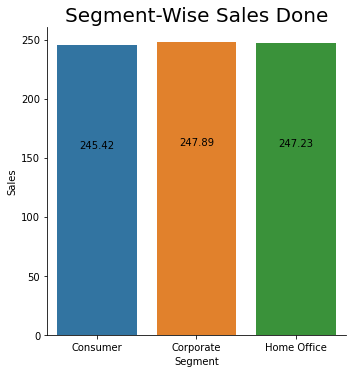

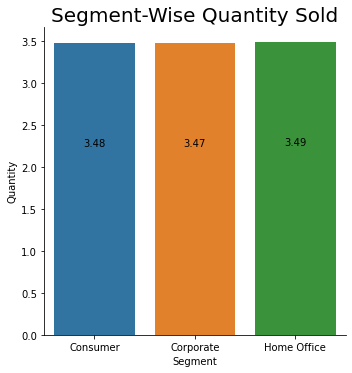

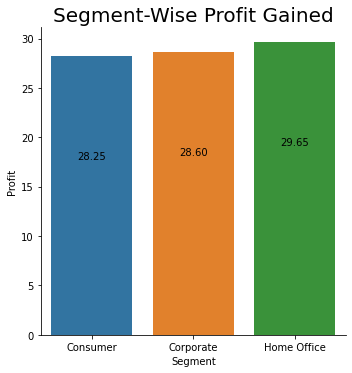

In [44]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Profit Gained", fontsize=20)


In [ ]:
From these graphs, we can conclude that
* All types of Segments have shown almost same number of sales.
* All types of Segments have shown almost same number of quantity sold.
* Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

In [ ]:
# EDA SubCategory-Wise

In [25]:
subcategory_group = superstore_df.groupby(['Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()

C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/439244408.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subcategory_group = superstore_df.groupby(['Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()


In [26]:
subcategory_group

,Sub-Category,Sales,Quantity,Profit
0,Accessories,243.654315,3.559675,42.154896
1,Appliances,576.105017,3.463248,80.729681
2,Art,76.201508,3.338317,11.868505
3,Binders,75.083145,3.483257,11.776633
4,Bookcases,608.283800,3.446703,67.160688
5,Chairs,437.298126,3.592312,40.884178
6,Copiers,679.008670,3.353126,116.314687
7,Envelopes,70.186571,3.441478,12.156516
8,Fasteners,34.397651,3.466942,4.762572
9,Furnishings,121.633519,3.541009,14.816223


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

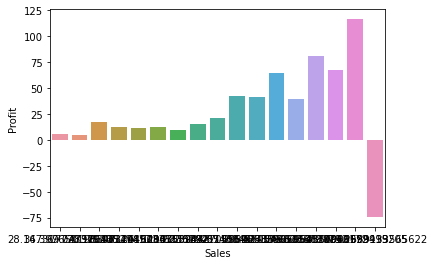

In [28]:
sns.barplot(data = subcategory_group, x = 'Sales', y = 'Profit', estimator = np.mean)

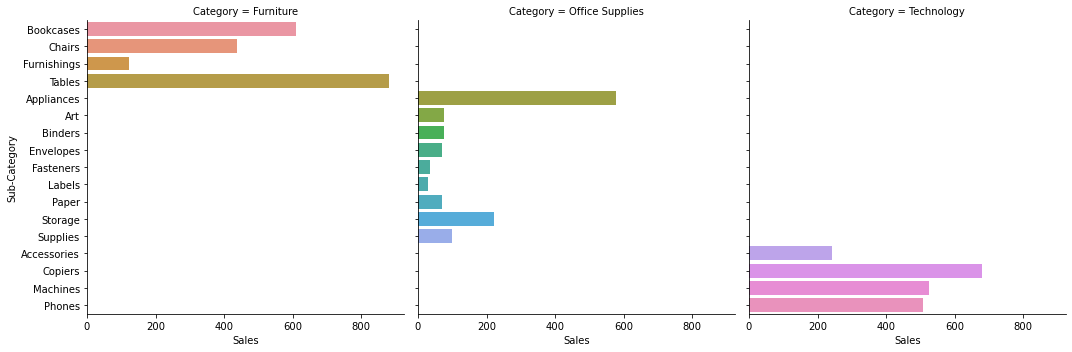

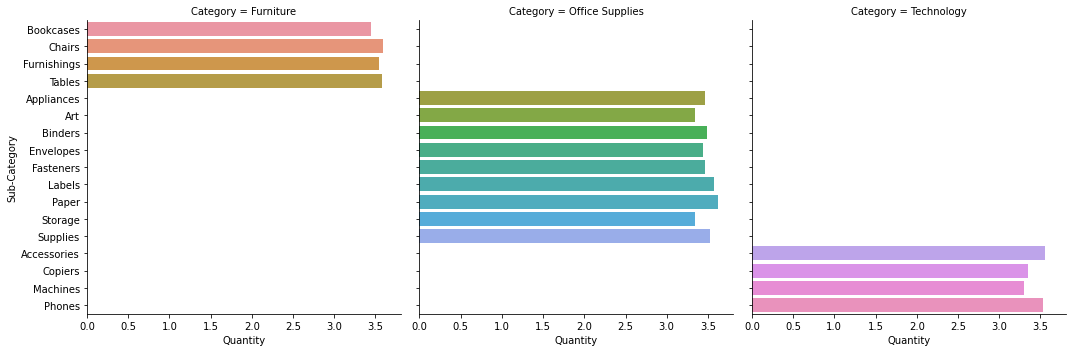

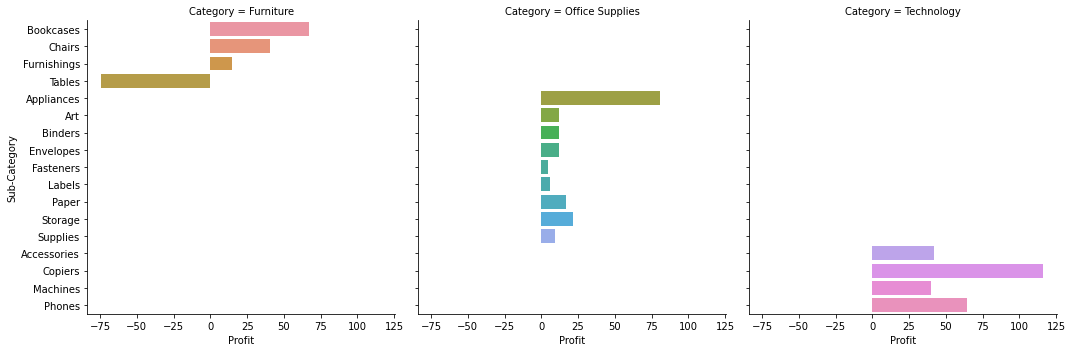

In [29]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

In [ ]:
From these graphs, we can conclude that

In technology category, Sales are more than other two category.
In technology category, Copiers and Machines are sold the most.
Quantity of products are almost sold in equal amount in each category.
In Furniture category, Bookcases and Tables are incurring a lose.
In Office Supplies category, there is a very minimal profit in all sub-categories.
In technology category, Copiers provide the most profit among all others.

In [ ]:
# EDA City-Wise

In [31]:
city_group = superstore_df.groupby(['City'])['Sales','Quantity','Profit'].mean().reset_index()

C:\Users\PUBLIC~1.LAP\AppData\Local\Temp/ipykernel_17164/142732382.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_group = superstore_df.groupby(['City'])['Sales','Quantity','Profit'].mean().reset_index()


In [32]:
city_group

,City,Sales,Quantity,Profit
0,Aachen,223.714765,3.529412,65.704765
1,Aalen,979.695000,3.000000,283.005000
2,Aalst,96.832500,3.750000,38.077500
3,Aba,42.564960,2.080000,-59.022240
4,Abadan,123.177273,1.727273,21.256364
...,...,...,...,...
3631,Zwedru,49.410000,1.000000,11.850000
3632,Zwickau,33.010000,2.666667,6.460000
3633,Zwolle,75.292500,5.000000,-27.547500
3634,eMbalenhle,37.950000,2.000000,6.810000


In [40]:
sorted_sales = city_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = city_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = city_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

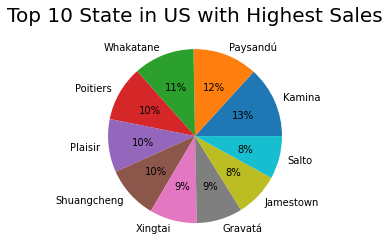

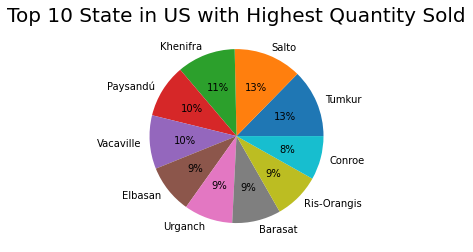

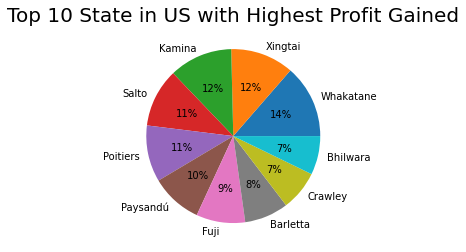

In [41]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.City
quantity_labels = sorted_quantity.City
profit_labels = sorted_profit.City

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

In [ ]:
From these graphs, we can conclude that

Bhilwara and Crawley sales are highest among all but with a profit of only 8%.
Almost all top 10 states have same quantity sold
Kamina and Xingtai gained the highest profit among all.

In [ ]:
# EDA State-Wise

In [35]:
state_group

,State,Sales,Quantity,Profit
0,'Ajman,52.497000,2.750000,-83.178000
1,'Amman,179.199750,2.575000,44.949750
2,'Asir,200.437500,2.500000,38.831250
3,Abia,42.564960,2.080000,-59.022240
4,Abruzzi,373.541667,4.166667,54.320000
...,...,...,...,...
1089,Zinder,90.682500,3.750000,30.570000
1090,Zulia,116.914916,4.222222,-27.615084
1091,Zürich,344.345294,4.117647,99.808235
1092,iauliai,24.140250,3.250000,-41.184750


In [36]:
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

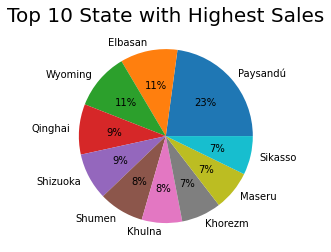

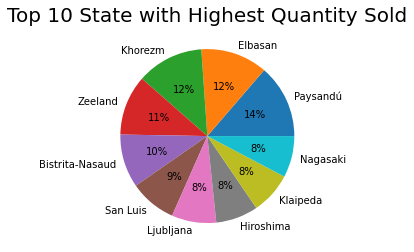

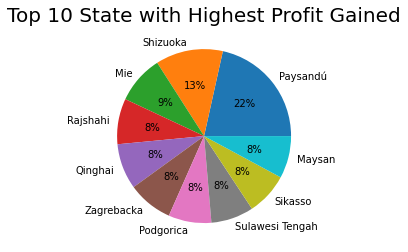

In [37]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State with Highest Profit Gained", fontsize=20)
plt.show()

In [ ]:
From these graphs, we can conclude that
* Maysan,Sikasso,Sulawesi Tengah,Podgorica,Zagrebacka,Oinghai,Rajshahi sales are highest among all but with a profit of only 8%.
* Almost all top 10 states have same quantity sold 
* Paysandu State gained the highest profit among all.

In [ ]:
# EDA Category-Wise

In [42]:
category_group

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,608.283800,3.446703,67.160688
1,Furniture,Chairs,437.298126,3.592312,40.884178
2,Furniture,Furnishings,121.633519,3.541009,14.816223
3,Furniture,Tables,879.258913,3.580720,-74.429023
4,Office Supplies,Appliances,576.105017,3.463248,80.729681
5,Office Supplies,Art,76.201508,3.338317,11.868505
6,Office Supplies,Binders,75.083145,3.483257,11.776633
7,Office Supplies,Envelopes,70.186571,3.441478,12.156516
8,Office Supplies,Fasteners,34.397651,3.466942,4.762572
9,Office Supplies,Labels,28.167318,3.577130,5.759982


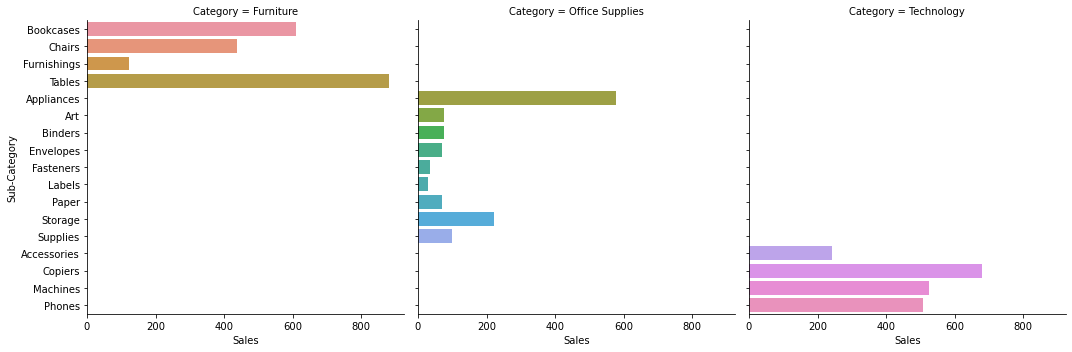

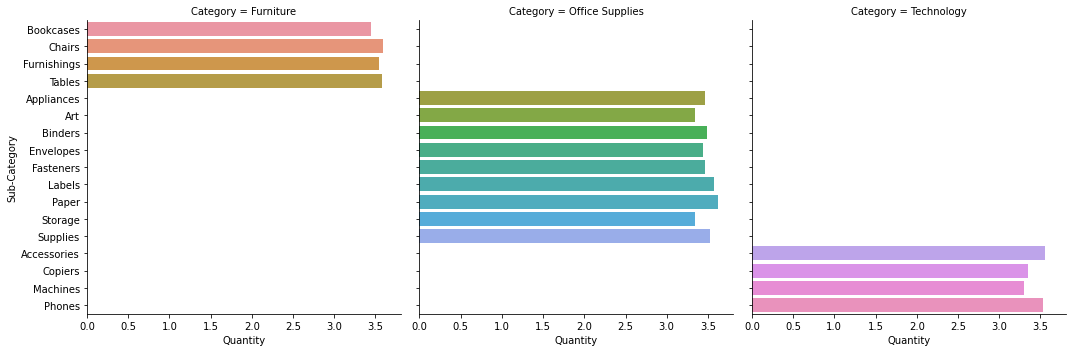

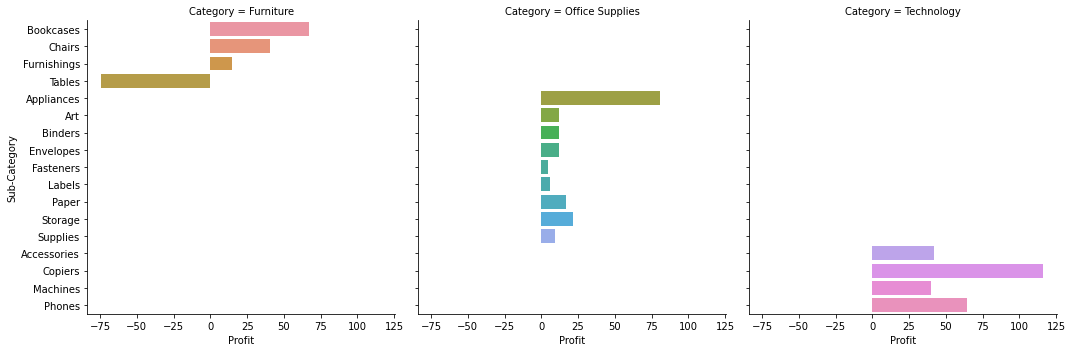

In [43]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

In [ ]:
From these graphs, we can conclude that
* In technology category, Quantity are more than other two category.
* In technology category, Copiers and Phones are sold the most.
* In Furniture category, Furnishings and Tables are incurring a lose.
* In Office Supplies category, there is a very minimal profit in all sub-categories.
* In technology category, Copiers provide the most profit among all others.